<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/qf-workshop-2021/introduction-to-machine-learning/blob/main/1_notebooks/introduction-to-machine-learning.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Learning Tools

## Books Reference

These introductory lessons assume a basic level of statistical and mathematical knowledge. No previous knowledge of Machine Learning is assumed. For this reason I have decided to use two basic texts for the preparation of these lessons that you can consult for further details on the topics we are going to deal with.

- John C. Hull, **Machine Learning in Business, An Introduction to the World of Data Science**, Amazon (2019)

- Paul Wilmott}, **Machine Learning, An Applied Mathematics Introduction**, Panda Ohana Publishing (2019)

## A Few Words on Google Colab

Although it is not essential to work in a colab environment (all the course notebooks are in fact designed to be able to run without problems locally on your pc), it is useful to know some basic elements of the interaction with colab. In particular, in the cells below you will find two examples for the use of external files. In the first case it is shown how to load a text file from your local PC into the google virtual machine. The second example relates to the opposite operation: let's create a simple pandas dataframe into the colab environment and export it in csv format to the local machine.

### How Upload a File on Google Colab

In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [2]:
with open(path + "carroll-alice.txt", "r") as f:
    alice = f.read()
    
alice[:392]    

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"

### How Download a File on Google Colab

In [3]:
import pandas as pd

cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = pd.DataFrame(cars, columns= ['Brand', 'Price'])

In [4]:
if 'google.colab' in str(get_ipython()):
    # if we run in google environment first we save in virtual machine...
    df.to_csv ('export_dataframe.csv', index = False, header=True)
    # ...then we download to local machine
    from google.colab import files
    files.download("export_dataframe.csv")    
else:
    # if we are working in local we save directly with the usual method
    df.to_csv ('./data/export_dataframe.csv', index = False, header=True)

# General Ideas

## What is Machine Learning?

Two definitions of Machine Learning are offered. [Arthur Samuel](https://en.wikipedia.org/wiki/Arthur_Samuel) described it as: "the field of study that gives computers the ability to learn without being explicitly programmed." This is an older, informal definition.

Tom Mitchell provides a more modern definition: "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."

Example: playing checkers.

E = the experience of playing many games of checkers

T = the task of playing checkers.

P = the probability that the program will win the next game.


To use machine learning effectively **you have to understand how the underlying algorithms work**. It is tempting to learn a language such as Python or R and apply various packages to your data without really understanding what the packages are doing or even how the results should be interpreted. This would be a bit like a finance specialist using the Black and Scholes model to value options without understanding where it comes from or its limitations.


### Type of Machine Learning Models ###

There are four main categories of machine learning models:

- Supervised Learning
- Unsupervised Learning
- Semi-Supervised Learning
- Reinforcement Learning 

Supervised learning is concerned with using data to make predictions. We can distinguish between supervised learning models that are used to predict a variable and models that are used for classification. 

Unsupervised learning is concerned with recognizing patterns in data. The main object is not to forecast a particular variable, rather it is to understand the data environment better.

### Jargon

The data for supervised learning contains whare are referred to as **features** and **labels**. The **labels** are the values of the target that is to be predicted. The **features** are the variables from which the predictions are to be made. For example when predicting the price of a house the **features** could be the swuare meters of living space, the number of bedrooms, the number of bathrooms, the size of the garage and so on. The **label** would be the house price.

The data for unsupervised learning consists of features but no labels because the model is being used to identify patterns not to forecast something.

### Type of Data ###

There are two types of data:

- Numerical
- Categorical

Numerical data consists of numbers. Categorical data is data which can fall into a number of different categories, for example data to predict a house price might categorize driveways as asphalt, concrete, grass, etc. Categorical data must be converted to numbers for the purposes of analysis. 

The standard way of dealing with categorical features is to create a dummy variable for each category. The value of this variable is 1 if the feature is in the category and 0 otherwise. For example in the situation in which individuals are categorized as male or female, we could create two dummy variables. For man the first dummy variable would be 1 and the second would be 0. The opposite for women. This procedure is appropriate when there is no natural ordering between the feature values.

When there is a natural ordering, we can reflect this in the numbers assigned. For example if the size of an order is classified as small, medium or large, we can replace the feature by a numerical variable where *small = 1*, *medium = 2* and *large = 3*.

## Feature Normalization

The success of a machine learning algorithm highly depends on the quality of the data fed into the model. Real-world data is often dirty containing outliers, missing values, wrong data types, irrelevant features, or non-standardized data. The presence of any of these will prevent the machine learning model to properly learn. For this reason, transforming raw data into a useful format is an essential stage in the machine learning process. One technique you will come across multiple times when pre-processing data is feature normalization.

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this notebook, we will cover the most important ones:

- The maximum absolute scaling
- The min-max feature scaling
- The z-score method

### The maximum absolute scaling

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

$$
x_{new} = \frac{x_{old}}{\max \vert x_{old} \vert}
$$

### The min-max feature scaling

The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range:

$$
x_{new} = \frac{x_{old}-x_{min}}{x_{max}-x_{min}}
$$

### Z-Score

The z-score method (often called standardization) transforms the data into a distribution with a mean of 0 and a standard deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature and then dividing by the standard deviation.

$$
x_{new} = \frac{x_{old} - \mu}{\sigma}
$$

Unlike min-max scaling, the z-score does not rescale the feature to a fixed range. The z-score typically ranges from -3.00 to 3.00 (more than 99% of the data) if the input is normally distributed.

It is important to bear in mind that z-scores are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input. This transformed distribution has a mean of 0 and a standard deviation of 1 and is going to be the standard normal distribution only if the input feature follows a normal distribution.

## Cost Functions 


### Linear Cost Function 

In Machine Learning a cost function or loss function is used to represent how far away a mathematical model is from the real data. One adjusts the mathematical model, usually by varying parameters within the model, so as to minimize the cost function. 

Let's take for example the simple case of a linear fitting. We want to find a relationship of the form 

\begin{equation}
y=\theta_0 +\theta_1x
\end{equation}

where the $\theta$s are the parameters that we want to find to give us the best fit to the data. We call this linear function $h_\theta(x)$ to emphasize the dependence on both the variable $x$ and the two parameters $\theta_0$ and $\theta_1$.


We want to measure how far away the data, the $y^{(n)}$s, are from the function $h_\theta(x)$. A common way to do this is via the quadratic *cost function*

\begin{equation}
J(\mathbf{\theta}) = \frac{1}{2N} \sum\limits_{n=1}^N \left[ h_\theta \left( x^{(n)} \right) - y^{(n)} \right]^2
\label{eq:ols}
\end{equation}

This is called *Ordinary Least Squares*.

In this case, the minimum is easily find analitically, differentiate $\eqref{eq:ols}$ with respect to both $\theta$s and set the result to zero:

\begin{equation}
\begin{array}{lcl} 
\frac{\partial J}{\partial \theta_0} & = & \sum\limits_{n=1}^N \left( \theta_0 + \theta_1 x^{(n)} - y^{(n)} \right) = 0 
\\ 
\frac{\partial J}{\partial \theta_1} & = & \sum\limits_{n=1}^N x^{(n)} \left( \theta_0 + \theta_1 x^{(n)} - y^{(n)} \right) = 0 
\end{array}
\end{equation}

The solution is trivially obtained for both $\theta$s

\begin{equation}
\begin{array}{lcl} 
\theta_0 = \frac{\left(\sum y \right) \left(\sum x^2 \right) -\left(\sum x \right) \left(\sum xy \right) }{N\left(\sum x^2 \right) \left(\sum x \right)^2 } 
\\ 
\theta_1 = \frac{N\left(\sum xy \right) - \left(\sum y \right)\left(\sum x \right)}{N\left(\sum x^2 \right) \left(\sum x \right)^2 }
\end{array}
\end{equation}




## Gradient Descent

The scheme works as follow: start with an initial guess for each parameter $\theta_k$. Then move $\theta_k$ in the direction of the slope:

\begin{equation}
\theta_k^{new} =\theta_k^{old}+\beta \frac{\partial J}{\partial \theta_k}
\end{equation}

**Update all $\theta_k$ simultaneously** and repet until convergence. Here $\beta$ is a *learning factor* that governs how far you move. if $\beta$ is too small it will take a long time to converge, if too large it will overshoot and might not converge at all. 

The loss function $J$ is a function of all of the data points. In the above description of gradient descent we have used all of the data points simultaneously. This is called *batch gradient* descent. But rather than use all of the data in the parameter updating we can use a technique called *stochastic gradient descent*. This is like batch gradient descent except that you only update using *one* of the data points each time. And that data point is chosen randomly.

\begin{equation}
J(\mathbf{\theta}) = \sum\limits_{n=1}^N J_n(\mathbf{\theta})
\end{equation}

Stochastic gradient descent means pick an *n* at random and then update according to 

\begin{equation}
\theta_k^{new} =\theta_k^{old}+\beta \frac{\partial J_n}{\partial \theta_k}
\end{equation}

Repeat, picking another data point at random, etc.

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. 

<!--
<div>
<img src="pic_50.png" width="600"/>
</div>
-->
![caption](pic_50.png)

If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time...

<!--
<div>
<img src="pic_51.png" width="600"/>
</div>
-->
![caption](pic_51.png)

... on the other hand, if the learning rate is too high, you might jump across the valley. This might make the algorithm diverge failing to find a good solution. 

<!--
<div>
<img src="pic_52.png" width="600"/>
</div>
-->
![caption](pic_52.png)

## Validation and Testing 

When data is used for forecasting there is a danger that the machine learning model will work very well for data, but will not generalize well to other data. An obvious point is that it is important that the data used in a machine learning model be representative of the situations to which the model is to be applied. It is also important to test a model out-of-sample, by this we mean that the model should be tested on data that is different from the sample data used to determine the parameters of the model.

Data scientist refer to the sample data as the **training set** and the data used to determine the accuracy of the model as the **test set**, often a **validation set** is used as well as we explain later;

In [5]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [6]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1 = pd.read_table(path + "salary_vs_age_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df1.head())

   Age  Salary
0   25  135000
1   27  105000
2   30  105000
3   35  220000
4   40  300000


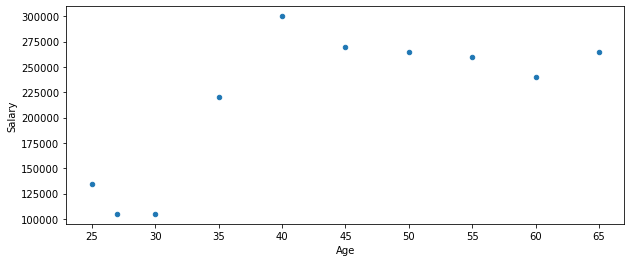

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 4]
ax=plt.gca()

df1.plot(x ='Age', y='Salary', kind = 'scatter', ax=ax)
plt.show()

[polynomial fitting with pandas](https://joshualoong.com/2018/10/03/Fitting-Polynomial-Regressions-in-Python/)

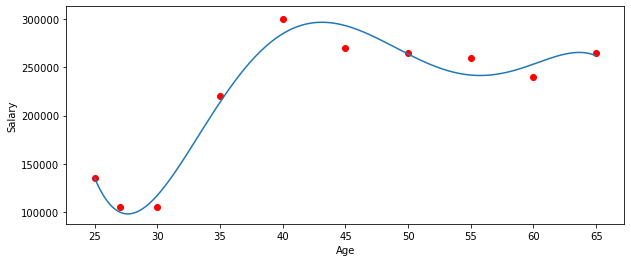

In [8]:
import numpy as np

x1 = df1['Age']
y1 = df1['Salary']

n = len(x1)

degree = 5

weights = np.polyfit(x1, y1, degree)
model   = np.poly1d(weights)

xx1 = np.arange(x1[0], x1[n-1], 0.1)
plt.plot(xx1, model(xx1))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x1,y1, color='red')
plt.show()

In [9]:
y1  = np.array(y1)
yy1 = np.array(model(x1))

rmse = np.sqrt(np.sum((y1-yy1)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
12902.203044361002


In [10]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [11]:
df2 = pd.read_table(path + "salary_vs_age_2.csv", sep=";") 
x2 = df2['Age']
y2 = df2['Salary']
n  = len(x2)

y2  = np.array(y2)
yy2 = np.array(model(x2))

rmse = np.sqrt(np.sum((y2-yy2)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
38825.22050917512


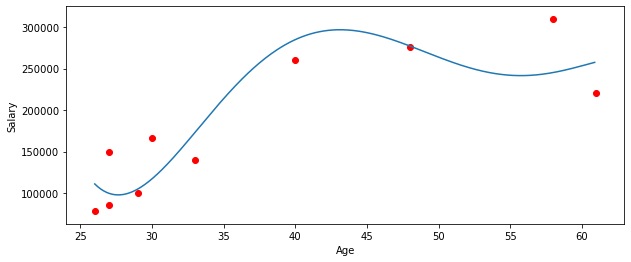

In [12]:
xx2 = np.arange(x2[0], x2[n-1], 0.1)
plt.plot(xx2, model(xx2))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x2,y2, color='red')
plt.show()

- The root mean squared error (rmse) for the training      data set is \$12,902
- The rmse for the test data set is \$38,794

We conclude that the model overfits the data. The complexity of the model should be increased only until out-of-sample tests indicate that it does not generalize well.

## Bias and Variance

Suppose there is a relationship between an independent variable $x$ and a dependent variable $y$:

\begin{equation}
    y=f(x) + \epsilon
\end{equation}

Where $\epsilon$ is an error term with mean zero and variance $\sigma^2$. The error term captures either genuine randomness in the data or noise due to measurement error.

Suppose we find a deterministic model for this relationship:

\begin{equation}
    y = \hat f(x)
\end{equation}

Now it comes a new data point $x^\prime$ not in the training set and we want to predict the corresponding $y^\prime$. The error we will observe in our model at point $x^\prime$ is going to be

\begin{equation}
    \hat f(x^\prime) - f(x^\prime) - \epsilon
\end{equation}

There are two different sources of error in this equation. The first one is included in the factor $\epsilon$, the second one, more interesting, is due to what is in our training set. A robust model should give us the same prediction whatever data we used for training out model. Let's look at the average error:

\begin{equation}
E \left[ \hat f (x^\prime ) \right] - f(x^\prime)
\end{equation}

where the expectation is taken over random samples of training data (having the same distributio as the training data). 

This is the definition of the **bias**

\begin{equation}
    \textrm{Bias} \left[\hat f (x^\prime) \right] = E \left[ \hat f (x^\prime ) \right] - f(x^\prime)
\end{equation}

We can also look at the mean square error

\begin{equation}
E \left[\left( \hat f (x^\prime ) - f(x^\prime) - \epsilon \right)^2\right] =
\left[ \textrm{Bias} \left( \hat f(x^\prime) \right) \right]^2 + \textrm{Var}\left[ \hat f(x^\prime) \right] + \sigma^2
\end{equation}

Where we remember that $\hat f (x^\prime)$ and $\epsilon$ are independent.

This show us that there are two important quantities, the **bias** and the **variance** that will affect our results and that we can control to some extent. 

**FIGURE 1.1 - A good model should have low bias and low variance**

<!--
<div>
<img src="bias_and_variance_1.png" width="600"/>
</div>
-->
![caption](bias_and_variance_1.png)

**Bias is how far away the trained model is from the correct result on average**. Where *on average* means over many goes at training the model using different data. And **Variance is a measure of the magnitude of that error**.


Unfortunately, we often find that there is a trade-off between bias and variance. As one is reduced, the other is increased. This is the matter of over- and under-fitting.

**Overfitting is when we train our algorithm too well on training data, perhaps having too many parameters for fitting**.


<!--
<div>
<img src="bias_and_variance_2.png" width="600"/>
</div>
-->
![caption](bias_and_variance_2.png)

## Regularization

### Ridge Regression 





Ridge regression is a regularization technique where we change the function that is to be minimize. Reduce magnitude of regression coefficients by choosing a parameter $\lambda$ and minimizing
		
\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2	+ \lambda \sum\limits_{n=1}^N b_i^2 \notag
\end{equation}

This change has the effect of encouraging the model to keep the weights $b_j$ as small as possibile. The Ridge regression should only be used for determining model parameters using the training set. Once the model parameters have been determined the penalty term should be removed for prediction.

In [13]:
columns_titles = ["Salary","Age"]
df2=df1.reindex(columns=columns_titles)
df2

,Salary,Age
0,135000,25
1,105000,27
2,105000,30
3,220000,35
4,300000,40
5,270000,45
6,265000,50
7,260000,55
8,240000,60
9,265000,65


In [14]:
df2['Salary'] = df2['Salary']/1000 
df2['Age2']=df2['Age']**2
df2['Age3']=df2['Age']**3
df2['Age4']=df2['Age']**4
df2['Age5']=df2['Age']**5
df2

,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,25,625,15625,390625,9765625
1,105.0,27,729,19683,531441,14348907
2,105.0,30,900,27000,810000,24300000
3,220.0,35,1225,42875,1500625,52521875
4,300.0,40,1600,64000,2560000,102400000
5,270.0,45,2025,91125,4100625,184528125
6,265.0,50,2500,125000,6250000,312500000
7,260.0,55,3025,166375,9150625,503284375
8,240.0,60,3600,216000,12960000,777600000
9,265.0,65,4225,274625,17850625,1160290625


We can compute the z-score in Pandas using the .mean() and std() methods.

In [15]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df2_standard = z_score(df2)
df2_standard['Salary'] = df2['Salary']
df2_standard

,Salary,Age,Age2,Age3,Age4,Age5
0,135.0,-1.289948,-1.128109,-0.988322,-0.873562,-0.782128
1,105.0,-1.148195,-1.045510,-0.943059,-0.849996,-0.770351
2,105.0,-0.935566,-0.909699,-0.861444,-0.803378,-0.744782
3,220.0,-0.581185,-0.651577,-0.684372,-0.687799,-0.672266
4,300.0,-0.226804,-0.353745,-0.448740,-0.510508,-0.544103
5,270.0,0.127577,-0.016202,-0.146184,-0.252677,-0.333075
6,265.0,0.481958,0.361052,0.231663,0.107030,-0.004250
7,260.0,0.836340,0.778017,0.693166,0.592463,0.485972
8,240.0,1.190721,1.234693,1.246690,1.229979,1.190828
9,265.0,1.545102,1.731080,1.900602,2.048447,2.174155


In [16]:
y = df2_standard['Salary']
X = df2_standard.drop('Salary',axis=1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))


Coefficients: 
 [ -32622.57240727  135402.73116519 -215493.11781297  155314.61367273
  -42558.76209732]
Mean squared error: 149.82


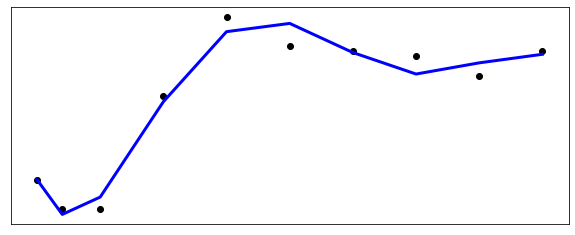

In [18]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
rr = Ridge(alpha=0.1, normalize=True) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X, y)

y_pred_r = rr.predict(X)


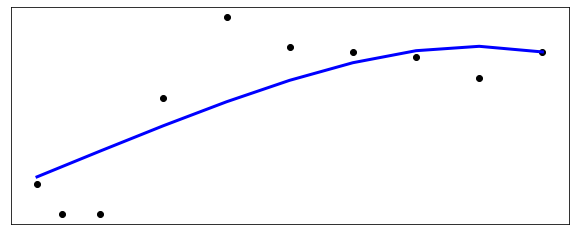

In [20]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred_r, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
# The coefficients
print('Coefficients: \n', rr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_r))

Coefficients: 
 [ 59.22629315  29.03476514   3.29697763 -16.42544961 -30.17329953]
Mean squared error: 1615.07


### Lasso Regression



Lasso is short for \textit{Least Absolute Shrinkage and Selection Operator}. It is similar to ridge regression except we minimize

\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2 + \lambda \sum\limits_{n=1}^N \vert b_n \vert \notag
\end{equation}

This function cannot be minimized analytically and so a variation on the gradient descent algorithm must be used. Lasso regression also has the effect of simplifying the model. It does this by setting the weights of unimportant features to zero. When there are a large number of features, Lasso can identify a relatively small subset of the features that form a good predictive model.

In [22]:
from sklearn.linear_model import Lasso

lsr = Lasso(alpha=.02, normalize=True, max_iter=1000000) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
lsr.fit(X, y)

y_pred_lsr = rr.predict(X)

In [23]:
# The coefficients
print('Coefficients: \n', lsr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_lsr))

Coefficients: 
 [ 344.99709034   -0.         -471.80600937   -0.          183.42041303]
Mean squared error: 1615.07


In [ ]:
# Plot outputs
plt.scatter(X['Age'], y,  color='black')
plt.plot(X['Age'], y_pred_lsr, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Elastic Net Regression

Middle ground between Ridge and Lasso. Minimize

\begin{equation}
		\frac{1}{2N} \sum\limits_{n=1}^N \left[h_\theta \left( x^{(n)} \right) - y ^{(n)}\right]^2 + \lambda_1 \sum\limits_{n=1}^N b_n^2 + \lambda_2 \sum\limits_{n=1}^N \vert b_n \vert \notag
\end{equation}

In Lasso some weights are reduced to zero but others may be quite large. In Ridge, weights are small in magnitude but they are not reduced to zero. The idea underlying Elastic Net is that we may be able to get the best of both by making some weights zero while reducing the magnitude of the others.

In [ ]:
from sklearn.linear_model import ElasticNet

# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# What is Unsupervised Learning

Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

## *k*-Means Clustering

*k*-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the **nearest** cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

<div>
<img src="K-means_convergence.gif" width="300"/>
</div>

By Chire - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=59409335

### How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.
- The defined number of iterations has been achieved.

### A Distance Measure

For clustering we need a distance measure. The simplest distance measure is the Euclidean Distance measure:

$$
Distance = \sqrt{(x_B-x_B)^2 + (y_B - y_A)^2}
$$

### K-means algorithm example problem
Let’s see the steps on how the K-means machine learning algorithm works using the Python programming language.
We’ll use the Scikit-learn library and some random data to illustrate a K-means clustering simple explanation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Here is the code for generating some random data in a two-dimensional space:

In [ ]:
X  =    -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 10, c = 'b')
plt.grid()
plt.show()

This give us two sets approximately centered about (-1,-1) and (2, 2). We’ll use some of the available functions in the Scikit-learn library to process the randomly generated data.

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

In this case, we arbitrarily gave k (n_clusters) an arbitrary value of two.
Here is the output of the K-means parameters we get if we run the code:

In [ ]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
 random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.cluster_centers_

Let's display the cluster centroids

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =10, c='b')
plt.scatter(-0.94665068, -0.97138368, s=100, c='g', marker='s')
plt.scatter( 2.01559419,  2.02597093, s=100, c='r', marker='s')
plt.grid()
plt.show()

Here is the code for getting the labels property of the K-means clustering example dataset; that is, how the data points are categorized into the two clusters.

In [ ]:
Kmean.labels_

As you can see above, 50 data points belong to the 0 cluster while the rest belong to the 1 cluster.

For example, let’s use the code below for predicting the cluster of a data point:

In [ ]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

## A Country Risk Example

In [ ]:
# loading packages 

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### The Country Risk Dataset (J. C. Hull, 2019, Chapter 2)

Consider the problem of understanding the risk of countries for foreign investment. Among the features that can be used for this are:

- GDP growth rate (IMF)
- Corruption index (Transparency international)
- Peace index (Institute for Economics and Peace)
- Legal Risk Index (Property Rights Association)

Values for each of the features for 122 countries are found in the `countryriskdata.csv` (available [here](http://www-2.rotman.utoronto.ca/~hull))   

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [ ]:
# load raw data
raw = pd.read_csv(os.path.join(path, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

The GDP growth rate (%) is typically a positive or negative number with a magnitude less than 10. The corruption index is on a scale from 0 (highly corrupt) to 100 (no corruption). The peace index is on a scale from 1 (very peaceful) to 5 (not at all peaceful). The legal risk index runs from 0 to 10 (with high values being favorable).

### Simple exploratory analysis

**Print summary statistics**

Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [ ]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())

**Plot histogram**

Note that distributions for GDP Growth is quite skewed.

In [ ]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

### K means cluster

**Pick features & normalization**

Since Corruption and Legal are highly correlated, we drop the Corruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [ ]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

### Perform elbow method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

For example in the following picture k=4 is suggested


<div>
<img src="pic_13_C.png" width="400"/>
</div>

In our case, the marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

In [ ]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

***k*-means with k=3**

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

**Visualize the result (3D plot)**

In [ ]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max())
cmap = cm.viridis

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, marker='o')

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

**Visualize the result (3 2D plots)**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

**Visualize the result (3 2D plots)**

plot country abbreviations instead of dots.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [ ]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


### Silhouette Analysis

For each observation $i$ calculate $a(i)$, the average distance from other observations in its cluster, and $b(i)$, the average distance from observations in the closest other cluster. The silhouette score for observation $i$, $s(i)$, is defined as 
		\begin{equation}
		s(i) = \frac{b(i)-a(i)}{\max[a(i),b(i)]}
\end{equation}		   

Choose the number of clusters that maximizes the average silhouette score across all observations

In [ ]:
# Silhouette Analysis
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette       = []
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    silhouette.append(silhouette_avg)
    #print("For n_clusters=", n_clusters,
    #      "The average silhouette_score is :", silhouette_avg)

In [ ]:
plt.plot(range_n_clusters, silhouette)

# Introduction to Supervised Learning

## Linear Regression

A linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the *bias* term (also called the *intercept*
term):

\begin{equation}
\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
\end{equation}

where:

- $\hat y$ is the predicted value;
- $n$ is the number of features;
- $x_i$ is the $i^{th}$ feature value;
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, \dots, \theta_n$

Training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Mean Square Error (RMSE), therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result.


## A Practical Example from Kaggle Competition

### The Problem

The objective is to predict the prices of house in Iowa from features. We have 800 observations in training set, 600 in validation set, and 508 in test set

### Categorical Features

Categorical features are features where there are a number of non-numerical alternatives. We can define a dummy variable for each alternative. The variable equals 1 if the alternative is true and zero otherwise. This is known as **one-hot encoding**.
But sometimes we do not have to do this because there is a natural ordering of variables. For example in this problem one of the categorical features is concerned with the basement quality as indicated by the ceiling height. The categories are:

- *Excellent (< 100 inches)*
- *Good (90-99 inches)*
- *Typical (80-89 inches)*
- *Fair (70-79 inches)*
- *Poor (< 70 inches)*
- *No Basement*

This is an example of a categorical variable where *there is* a natural ordering. We created a new variable that had a values of 5, 4, 3, 2, 1 and 0 for the above six categories respectively.

The other categorical features specifies the location of the house as in one of 25 neighborhoods. We introduce 25 dummy variables with a one-hot encoding. The dummy variable equals one for an observation if the neighborhood is that in which the house is located and zero otherwise.

### Loading data (J. C. Hull, 2019, Chapter 3)

To illustrate the regression techniques discussed in this chapter we will use a total of 48 feature. 21 are numerical and two are categorical and to this we had, as discussed above, 25 categorical variables for the neighborhoods. 

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [ ]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv(path + 'Houseprice_data_scaled.csv') 

First of all check how many records we have

In [ ]:
print("Number of available data = "  + str(len(data.index)))

Before starting we emphasize the need to divide all available data into three parts: a **training set**, a **validation set** and a **test set**. The training set is used to determine parameters for trial models. The validation set is used to determine the extent to chich the models created from the training set generalize to new data. Finally, the test set is used as a final estimate of the accuracy of the chosen model. 

We had 2908 observations. We split this as follows: 1800 in the training set, 600 in the validation set and 508 in the test set.

In [ ]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

We now procede to create **labels** and **features**. As we have already said, the labels are the values of the target that is to be predicted, in this case the 'Sale Price', and we indicate that whit 'y':

In [ ]:
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

The features and dummy variables were scaled using the Z-score method. Also the target values (i.e. the house prices) have been scaled with the Z-score method. The features are the variables from which the predictions are to be made and, in this case, can be obtained simply dropping the column 'Sale Price' from our dataset:

In [ ]:
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)

In [ ]:
X_train.columns

### Linear Regression with sklearn

In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
lr.intercept_

In [ ]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

In [ ]:
len(coeffs.index)

In [ ]:
pred_t=lr.predict(X_train)
mse(y_train,pred_t)

In [ ]:
pred_v=lr.predict(X_val)
mse(y_val,pred_v)

For the data we are considering it turns out that this regression model generalizes well. The mean squared error for the validation set was only a little higher than that for the training set. However linear regression with no regularization leads to some strange results because of the correlation between features. For example it makes no sense that the weights for number of full bathrooms and number of bedrooms are negative!

In [ ]:
x1 = X_train['GrLivArea']
x2 = X_train['BedroomAbvGr']
x1.corr(x2)

###### Ridge Regression

In [ ]:
# Importing Ridge
from sklearn.linear_model import Ridge

We try using Ridge regression with different values of the hyperparameter $\lambda$. The following code shows the effect of this parameter on the prediction error. 

In [ ]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

In [ ]:
plt.plot(alphas, mses)

As expected the prediction error increases as $\lambda$ increases. Values of $\lambda$ in the range $0$ to $0.1$ might be reasonably be considered because prediction errors increases only slightly when $\lambda$ is in this range. However it turns out that the improvement in the model is quite small for these values of $\lambda$.

###### Lasso

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

In [ ]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

In [ ]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

###### Lasso with different levels of alpha and its mse

In [ ]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.06/2, 0.08/2, 0.09/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print("lambda = " + '{:<05}'.format(alpha) + " - mse = " + str(round(mse(y_val, pred),6)))

In [ ]:
plt.plot(alphas, mses)

Lasso regression leads to more interesting results. In the plot above you can see how the error in the validation set changes as tha value of the lasso $\lambda$ increases. For small values of $\lambda$ the error is actually less than when $\lambda = 0$ but as $\lambda$ increases beyond about $0.03$ the error starts to increase. A value of $\lambda = 0.04$ could be chosen.   

# References

John C. Hull, **Machine Learning in Business: An Introduction to the World of Data Science**, Amazon, 2019.

Paul Wilmott, **Machine Learning: An Applied Mathematics Introduction**, Panda Ohana Publishing, 2019.